In [19]:
import csv
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [20]:
positions = ['(1,1)','(1,2)','(1,3)','(1,4)','(2,1)','(2,2)','(2,3)','(2,4)']
df = pd.DataFrame()
for i in range(len(positions)):
    df1 = pd.read_csv("data/raw/data1/lib_"+positions[i]+".csv", names = ['mac_address','rssi_value'], header=None)
    starting_mac_address = df1["mac_address"][0]
    list_rows = []
    dictionary = {}
    for row in df1.values:
        if row[0] == starting_mac_address:
            if len(dictionary) > 0:
                dictionary['position'] = positions[i]
                list_rows.append(dictionary)
            dictionary = {}
            dictionary[row[0]]=row[1]
        else:
            dictionary[row[0]]=row[1]
    df1 = pd.DataFrame.from_dict(list_rows)
    df = pd.concat([df, df1])

In [22]:
df.reset_index(drop = True, inplace=True)

In [23]:
df = df.sample(frac=1).reset_index(drop=True)

In [24]:
df

,00:78:88:2C:80:10,00:78:88:28:05:BF,00:C1:64:8A:85:8F,00:78:88:2C:80:1F,00:C1:64:C3:84:7F,00:78:88:81:10:FF,00:78:88:2E:72:2F,00:78:88:2E:72:20,00:C1:64:C3:84:70,00:78:88:18:1D:2F,...,00:C1:64:8A:85:80,00:78:88:2B:53:10,00:78:88:28:0F:90,00:78:88:4F:06:60,00:78:88:81:10:F0,00:78:88:4F:06:6F,00:78:88:2B:53:1F,00:C1:64:F2:F4:50,00:78:88:2E:72:5F,00:78:88:2E:75:10
0,-53,-69,-77.0,-56.0,NaN,NaN,NaN,NaN,-86.0,NaN,...,NaN,NaN,NaN,-68.0,NaN,-74.0,NaN,NaN,-79.0,NaN
1,-57,-59,-65.0,-54.0,NaN,NaN,-79.0,NaN,NaN,NaN,...,-69.0,-76.0,NaN,NaN,NaN,-78.0,-79.0,NaN,NaN,NaN
2,-69,-61,-78.0,-60.0,-78.0,-79.0,-80.0,NaN,-75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-80.0,NaN,NaN,NaN,NaN
3,-63,-54,-78.0,-62.0,NaN,-87.0,-86.0,-81.0,-77.0,-89.0,...,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-66,-57,-78.0,-66.0,NaN,-81.0,-86.0,NaN,NaN,NaN,...,-83.0,NaN,-80.0,-74.0,NaN,-78.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-55,-60,-65.0,-56.0,NaN,NaN,-80.0,NaN,-79.0,NaN,...,-68.0,NaN,NaN,-79.0,-86.0,-79.0,-79.0,NaN,NaN,NaN
380,-52,-68,-74.0,-52.0,NaN,NaN,-86.0,NaN,NaN,NaN,...,-75.0,-74.0,NaN,-66.0,NaN,-70.0,-88.0,NaN,-87.0,NaN
381,-64,-60,-79.0,-59.0,-79.0,-79.0,-79.0,-81.0,NaN,NaN,...,-81.0,-73.0,NaN,NaN,-87.0,NaN,NaN,NaN,NaN,NaN
382,-65,-53,-76.0,-62.0,NaN,-87.0,-85.0,NaN,-77.0,-87.0,...,-76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.fillna(0, inplace = True)

In [26]:
import numpy as np
df = df.loc[:, df.isin([' ','NULL',0, np.nan]).mean() < .75]

In [27]:
df.head()

,00:78:88:2C:80:10,00:78:88:28:05:BF,00:C1:64:8A:85:8F,00:78:88:2C:80:1F,00:78:88:81:10:FF,00:78:88:2E:72:2F,00:78:88:2E:72:20,00:C1:64:C3:84:70,position,00:78:88:28:05:B0,00:C1:64:F2:F3:50,00:78:88:18:1D:20,00:C1:64:8A:85:80,00:78:88:2B:53:10,00:78:88:4F:06:60,00:78:88:4F:06:6F,00:78:88:2B:53:1F
0,-53,-69,-77.0,-56.0,0.0,0.0,0.0,-86.0,"(2,4)",-70.0,0.0,0.0,0.0,0.0,-68.0,-74.0,0.0
1,-57,-59,-65.0,-54.0,0.0,-79.0,0.0,0.0,"(2,3)",-72.0,0.0,0.0,-69.0,-76.0,0.0,-78.0,-79.0
2,-69,-61,-78.0,-60.0,-79.0,-80.0,0.0,-75.0,"(2,2)",-58.0,0.0,-79.0,0.0,0.0,0.0,-80.0,0.0
3,-63,-54,-78.0,-62.0,-87.0,-86.0,-81.0,-77.0,"(2,1)",-50.0,0.0,-71.0,-72.0,0.0,0.0,0.0,0.0
4,-66,-57,-78.0,-66.0,-81.0,-86.0,0.0,0.0,"(1,2)",-56.0,-87.0,0.0,-83.0,0.0,-74.0,-78.0,0.0


In [28]:
from sklearn import preprocessing
  
label_encoder_pos = preprocessing.LabelEncoder()
  
df['position']= label_encoder_pos.fit_transform(df['position'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18824\897347208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position']= label_encoder_pos.fit_transform(df['position'])


In [29]:
print(label_encoder_pos.classes_)

['(1,1)' '(1,2)' '(1,3)' '(1,4)' '(2,1)' '(2,2)' '(2,3)' '(2,4)']


In [30]:
df

,00:78:88:2C:80:10,00:78:88:28:05:BF,00:C1:64:8A:85:8F,00:78:88:2C:80:1F,00:78:88:81:10:FF,00:78:88:2E:72:2F,00:78:88:2E:72:20,00:C1:64:C3:84:70,position,00:78:88:28:05:B0,00:C1:64:F2:F3:50,00:78:88:18:1D:20,00:C1:64:8A:85:80,00:78:88:2B:53:10,00:78:88:4F:06:60,00:78:88:4F:06:6F,00:78:88:2B:53:1F
0,-53,-69,-77.0,-56.0,0.0,0.0,0.0,-86.0,7,-70.0,0.0,0.0,0.0,0.0,-68.0,-74.0,0.0
1,-57,-59,-65.0,-54.0,0.0,-79.0,0.0,0.0,6,-72.0,0.0,0.0,-69.0,-76.0,0.0,-78.0,-79.0
2,-69,-61,-78.0,-60.0,-79.0,-80.0,0.0,-75.0,5,-58.0,0.0,-79.0,0.0,0.0,0.0,-80.0,0.0
3,-63,-54,-78.0,-62.0,-87.0,-86.0,-81.0,-77.0,4,-50.0,0.0,-71.0,-72.0,0.0,0.0,0.0,0.0
4,-66,-57,-78.0,-66.0,-81.0,-86.0,0.0,0.0,1,-56.0,-87.0,0.0,-83.0,0.0,-74.0,-78.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-55,-60,-65.0,-56.0,0.0,-80.0,0.0,-79.0,6,-66.0,0.0,0.0,-68.0,0.0,-79.0,-79.0,-79.0
380,-52,-68,-74.0,-52.0,0.0,-86.0,0.0,0.0,3,-56.0,-83.0,0.0,-75.0,-74.0,-66.0,-70.0,-88.0
381,-64,-60,-79.0,-59.0,-79.0,-79.0,-81.0,0.0,5,-60.0,0.0,0.0,-81.0,-73.0,0.0,0.0,0.0
382,-65,-53,-76.0,-62.0,-87.0,-85.0,0.0,-77.0,4,-53.0,0.0,-69.0,-76.0,0.0,0.0,0.0,0.0


In [31]:
x = df.drop(['position'], axis=1)
y = df['position']

In [32]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier()  

In [35]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 20],
    'criterion' :['gini', 'entropy']
}

In [36]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
#CV_rfc.fit(x, y)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [37]:
import pickle

In [38]:
pickle.dump(CV_rfc, open('model.pkl', 'wb'))

In [39]:
print("\n The best estimator across ALL searched params:\n",CV_rfc.best_estimator_)
print("\n The best score across ALL searched params:\n",CV_rfc.best_score_)
print("\n The best parameters across ALL searched params:\n",CV_rfc.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=4, max_features='auto')

 The best score across ALL searched params:
 1.0

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


In [40]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [41]:
y_pred= CV_rfc.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[ 8,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  1,  0,  1],
       [ 2,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  2, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 13]], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred)

0.8958333333333334

# Naive Bayes

In [44]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [45]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [46]:
pickle.dump(classifier, open('naive_bayes.pkl', 'wb'))

In [47]:
y_pred = classifier.predict(x_test)  
y_pred

array([6, 6, 6, 4, 7, 2, 5, 1, 4, 1, 6, 7, 2, 2, 6, 7, 6, 6, 0, 0, 6, 6,
       0, 1, 2, 1, 0, 5, 1, 7, 1, 6, 7, 7, 6, 3, 2, 6, 3, 2, 3, 2, 0, 4,
       3, 4, 7, 3, 1, 0, 3, 0, 6, 4, 0, 3, 0, 4, 3, 7, 3, 7, 1, 4, 3, 0,
       0, 3, 5, 6, 2, 6, 0, 2, 0, 3, 7, 7, 0, 2, 0, 6, 0, 6, 3, 3, 4, 7,
       6, 2, 5, 0, 5, 7, 3, 5])

In [48]:
accuracy_score(y_test, y_pred)

0.9166666666666666

# LSTM

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
x_train.shape

(288, 16)

In [51]:
x_train = x_train.values.reshape(-1, 1, 16)
x_test = x_test.values.reshape(-1, 1, 16)

In [52]:
from tensorflow.keras.utils import to_categorical

Y_train_encoded = to_categorical(y_train)
Y_test_encoded = to_categorical(y_test)

In [53]:
x_train[0]

array([[-60., -75., -80., -64., -81., -81.,   0.,   0., -49.,   0., -77.,
        -80.,   0.,   0.,   0.,   0.]])

In [54]:
model = Sequential()
model.add(LSTM(128, input_shape=(1,16)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# fit network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
Total params: 85,312
Trainable params: 85,312
Non-traina

In [55]:
history = model.fit(x_train, Y_train_encoded, epochs=500, validation_data=(x_test, Y_test_encoded), batch_size=4, verbose=2, shuffle=False)

Epoch 1/500
72/72 - 5s - loss: 1.9349 - accuracy: 0.2500 - val_loss: 1.6996 - val_accuracy: 0.3229 - 5s/epoch - 67ms/step
Epoch 2/500
72/72 - 0s - loss: 1.5261 - accuracy: 0.3819 - val_loss: 1.3767 - val_accuracy: 0.4062 - 429ms/epoch - 6ms/step
Epoch 3/500
72/72 - 0s - loss: 1.1913 - accuracy: 0.5417 - val_loss: 1.1434 - val_accuracy: 0.5729 - 335ms/epoch - 5ms/step
Epoch 4/500
72/72 - 0s - loss: 0.9975 - accuracy: 0.6424 - val_loss: 1.0038 - val_accuracy: 0.6042 - 451ms/epoch - 6ms/step
Epoch 5/500
72/72 - 0s - loss: 0.8415 - accuracy: 0.6597 - val_loss: 0.8550 - val_accuracy: 0.6354 - 329ms/epoch - 5ms/step
Epoch 6/500
72/72 - 0s - loss: 0.7658 - accuracy: 0.6771 - val_loss: 0.7533 - val_accuracy: 0.7188 - 301ms/epoch - 4ms/step
Epoch 7/500
72/72 - 0s - loss: 0.6932 - accuracy: 0.7257 - val_loss: 0.6856 - val_accuracy: 0.7500 - 295ms/epoch - 4ms/step
Epoch 8/500
72/72 - 0s - loss: 0.6296 - accuracy: 0.7604 - val_loss: 0.6879 - val_accuracy: 0.8021 - 312ms/epoch - 4ms/step
Epoch 9/50

In [56]:
pickle.dump(history, open('lstm.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://3877534b-33aa-45f6-b44e-ea0ba7244424/assets


INFO:tensorflow:Assets written to: ram://3877534b-33aa-45f6-b44e-ea0ba7244424/assets


NotFoundError: 

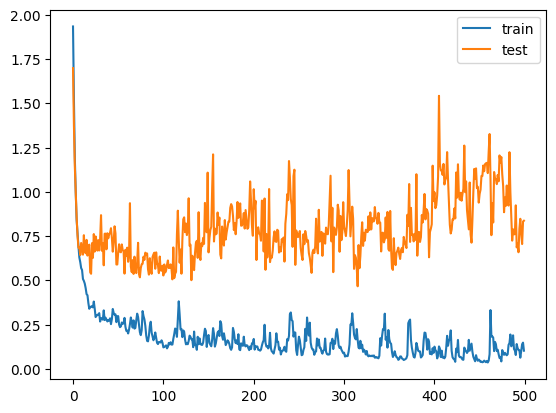

In [57]:
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# SVM 

In [58]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  


In [59]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [60]:
from sklearn.svm import SVC

svc=SVC() 

# fit classi|fier to training set
svc.fit(x_train,y_train)

# make predictions on test set
y_pred=svc.predict(x_test)

In [61]:
pickle.dump(svc, open('svm.pkl', 'wb'))

In [62]:
# compute and print accuracy score
accuracy_score(y_test, y_pred)

0.9479166666666666

In [63]:
from sklearn.svm import SVC

svc=SVC(kernel='poly') 

# fit classi|fier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

In [64]:
pickle.dump(svc, open('svm_poly.pkl', 'wb'))

In [65]:
accuracy_score(y_test, y_pred)

0.8645833333333334